# Data Preprocessing for Social Anxiety Detection : Participant 7

***
## Participant Details

__Gender:__ male <br/>
__Ethnicity:__ asian <br/>
__Age:__ 19 <br/>
__Self-reported Liebowitz social anxiety score:__ 61 <br/>
__Self-reported Liebowitz social anxiety category:__ moderate <br/>

***

## Contents

__1.Introduction <br/>__
1.1. Nature of the dataset <br/>
1.2. Description of the ML experiments <br/>
__2.Import packages <br/>__
__3.Import data <br/>__
3.1. Import HR data and resample <br/>
3.2. Import ST data <br/>
3.3. Import EDA data <br/>
__4.Record key values <br/>__
4.1. Key HR values <br/>
4.2. Key ST values <br/>
4.3. Key EDA values <br/>
__5.Combine data <br/>__
__6.Data labelling <br/>__
6.1. Labelling for experiment (1)<br/>
6.2. Labelling for experiment (2)  <br/>
6.3. Labelling for experiment (3)  <br/>
__7.Data visualisation and export__


***

## 1. Introduction

This notebook preprocesses the physiological data needed for Machine Learning (ML) experiments that investigate whether social anxiety can be detected in young people. 

### 1.1. Nature of the dataset

Physiological data is used in the ML experiments, the dataset consists of Heart Rate (HR) data, Skin Temperature (ST) data and Electrodermal Activity (EDA) data; this data is labelled in various ways depending on the classification context. The physiological data was recorded by a multi-sensor wristband wearable called E4 Empatica. Both EDA (μS) and ST (°C) are sampled at 4Hz whereas HR (BPM) was sampled at 1Hz.

The data was collected during twelve experiments involving young people who have been identified as subclinically socially anxious based on their scores from the self-reported version of the Liebowitz Social Anxiety Scale (LSAS-SR). The data was collected during an impromptu speech task used to invoke a social anxiety response (invoking both anticipation and reactive social anxiety). The task intiated with a relaxation period (invoking a baseline response) followed by task announcement and preparation period (invoking anticipation anxiety), this was then followed by performing the impromptu speech task (invoking reactive anxiety).

The data will be prepared for three different supervised ML experiment, where the feature matrix will consist of the preprocessed physiological data, and target matrix will consist of the labels which correspond to the correct class, see below.

<img src="../../images/FeatureMatrix.png" width="450"/>

### 1.2. Description of the ML experiments

__Experiment (1)__ investigates whether models can be trained to detect baseline and socially anxious states. The data is either labelled '0' during the baseline period and '1' during the anxiety period (during anticipation and reactive anxiety).

__Experiment (2)__ investigates whether models can be trained to differentiate between baseline, anticipation anxiety and reactive anxiety states  The data is labelled in three ways, '0' during the baseline period, '1' during the anticipation anxiety period and '2' during the reactive anxiety period.

__Experiment (3)__ investigates whether models can be trained to differentiate between social anxiety experienced by individuals with differing levels of social anxiety. The data is either labelled '0' for individuals in the 'moderate' social anxiety category period and '1' for individuals with scores in the marked social anxiety category based on scores reported using the self-reported version of Liebowitz Social Anxiety Scale (LSAS-SR).

***
## 2.Import packages  

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3.Import and combine data

### 3.1. Import HR data and resample

HR is imported and resampled to 4Hz so that all the data points have three dimensions (HR, ST and EDA). The data is then smoothed using a moving average filter in order to remove noise to reduce the risk of overfitting.

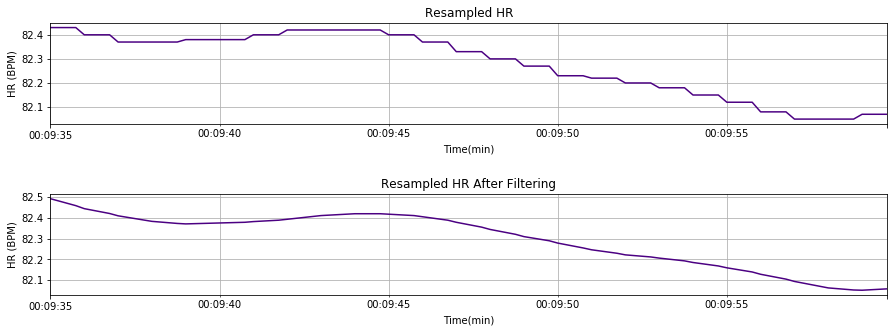

In [63]:
hr = pd.read_csv("HR.csv")
hr.index = pd.date_range('2020-03-04', periods = len(hr), freq='1S')

#resampling HR to 4Hz
hr_resample = hr.resample('0.25S').ffill()

#Applying moving average filter
rolling = hr_resample.rolling(window=9)
hr_filtered = rolling.mean()

#Plotting the comparison
fig, (ax1, ax2) = plt.subplots(2, 1)
hr_resample[2300:2400].plot( ax=ax1, legend=False, color = 'indigo')
ax1.yaxis.set_label_text("HR (BPM)")
ax1.xaxis.set_label_text('Time(min)')
ax1.set_title("Resampled HR")
ax1.grid(which='both', alpha=2)

hr_filtered[2300:2400].plot( ax=ax2, legend=False, color = 'indigo')
ax2.yaxis.set_label_text("HR (BPM)")
ax2.xaxis.set_label_text('Time(min)')
ax2.set_title("Resampled HR After Filtering")
ax2.grid(which='both', alpha=2)

fig.set_size_inches(15, 5)
fig.subplots_adjust(hspace=0.7)
plt.show()

### 3.2. Import ST data 

The ST data is imported and then smoothed using a moving average filter in order to remove noise to reduce the risk of overfitting.

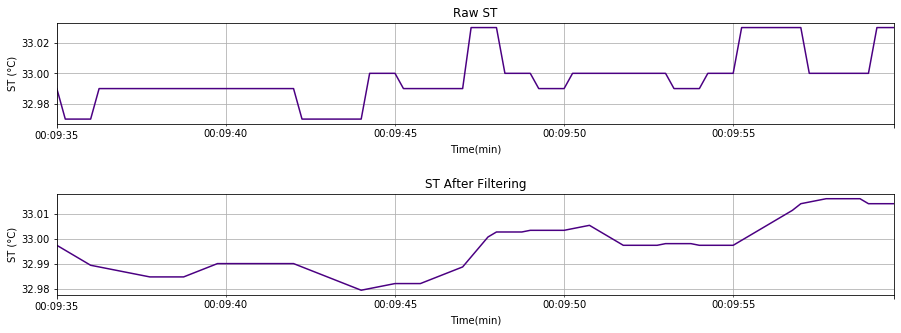

In [64]:
st = pd.read_csv("ST.csv")
st.index = pd.date_range('2020-03-04', periods = len(st), freq='0.25S')

#Applying moving average filter
rolling = st.rolling(window=15)
st_filtered = rolling.mean()

#Plotting the comparison
fig, (ax1, ax2) = plt.subplots(2, 1)
st[2300:2400].plot( ax=ax1, legend=False, color = 'indigo')
ax1.yaxis.set_label_text("ST (°C)")
ax1.xaxis.set_label_text('Time(min)')
ax1.set_title("Raw ST")
ax1.grid(which='both', alpha=2)

st_filtered[2300:2400].plot(ax=ax2, legend=False, color = 'indigo')
ax2.yaxis.set_label_text("ST (°C)")
ax2.xaxis.set_label_text('Time(min)')
ax2.set_title("ST After Filtering")
ax2.grid(which='both', alpha=2)

fig.set_size_inches(15, 5)
fig.subplots_adjust(hspace=0.7)
plt.show()

### 3.3. Import EDA data 

The EDA data is imported and then smoothed using a moving average filter in order to remove noise to reduce the risk of overfitting. The EDA data is also range corrected in order to remove inter-individual differences, more details about the range correction method can be found in the report.

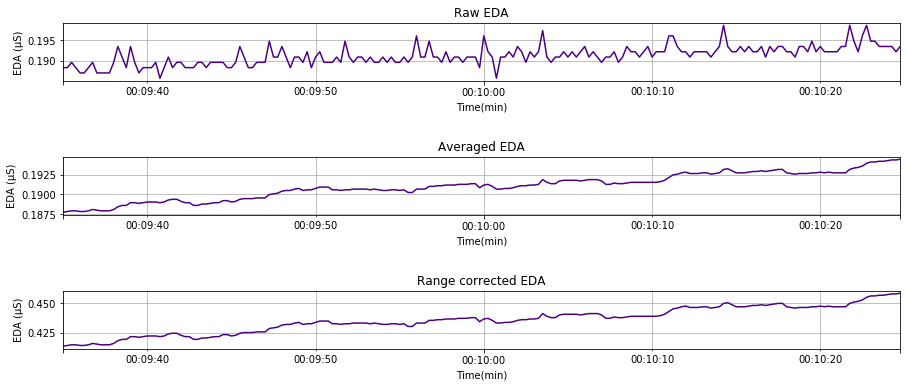

In [65]:
eda = pd.read_csv("EDA.csv")
eda.index = pd.date_range('2020-03-04', periods = len(eda), freq='0.25S')

#Applying moving average filter
rolling = eda.rolling(window=15)
eda_filtered = rolling.mean()

#Range corrected EDA - value - min/max-min
eda_corrected = (eda_filtered - 0.127)/(0.274-0.127)

#Plotting the comparison
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
eda[2300:2500].plot( ax=ax1, legend=False, color = 'indigo')
ax1.yaxis.set_label_text("EDA (μS)")
ax1.xaxis.set_label_text('Time(min)')
ax1.set_title("Raw EDA")
ax1.grid(which='both', alpha=2)

eda_filtered[2300:2500].plot( ax=ax2, legend=False, color = 'indigo')
ax2.yaxis.set_label_text("EDA (μS)")
ax2.xaxis.set_label_text('Time(min)')
ax2.set_title("Averaged EDA")
ax2.grid(which='both', alpha=2)

eda_corrected[2300:2500].plot( ax=ax3, legend=False, color = 'indigo')
ax3.yaxis.set_label_text("EDA (μS)")
ax3.xaxis.set_label_text('Time(min)')
ax3.set_title("Range corrected EDA")
ax3.grid(which='both', alpha=2)

fig.set_size_inches(15, 6)
fig.subplots_adjust(hspace=1.3)

eda_filtered=eda_corrected

plt.show()

#eda[480:5342].max()
#eda[480:5342].min()

## 4.Record key values

Key values such as mean and standard deviation were recorded from the raw physiological data for each stage of the experiment (baseline, anticipation and reactive periods). The cell range was calculated using the timestamps recorded during each experiment. These values were used when performing exploratory data analysis with the reported social anxiety scores.

### 4.1. Key HR values

In [66]:
#baseline
print('HR mean during baseline period: \n', hr_resample[480:2383].mean())
print('HR standard deviation during baseline period: \n',hr_resample[480:2383].std())
#anticipation
print('HR mean during anticipation period: \n', hr_resample[2383:4502].mean())
print('HR standard deviation during anticipation period: \n',hr_resample[2383:4502].std())
#reactive anxiety
print('HR mean during reactive period: \n', hr_resample[4502:5342].mean())
print('HR standard deviation during reactive period: \n',hr_resample[4502:5342].std())

HR mean during baseline period: 
 1583344456    81.49774
dtype: float64
HR standard deviation during baseline period: 
 1583344456    2.754976
dtype: float64
HR mean during anticipation period: 
 1583344456    89.538905
dtype: float64
HR standard deviation during anticipation period: 
 1583344456    3.545438
dtype: float64
HR mean during reactive period: 
 1583344456    85.637119
dtype: float64
HR standard deviation during reactive period: 
 1583344456    8.099133
dtype: float64


### 4.2. Key ST values

In [67]:
#baseline
print('ST mean during baseline period: \n', st[480:2383].mean())
print('ST standard deviation during baseline period: \n',st[480:2383].std())
#anticipation
print('ST mean during anticipation period: \n', st[2383:4502].mean())
print('ST standard deviation during anticipation period: \n',st[2383:4502].std())
#reactive anxiety
print('ST mean during reactive period: \n', st[4502:5342].mean())
print('ST standard deviation during reactive period: \n',st[4502:5342].std())

ST mean during baseline period: 
 1583344446.000000    32.790053
dtype: float64
ST standard deviation during baseline period: 
 1583344446.000000    0.112751
dtype: float64
ST mean during anticipation period: 
 1583344446.000000    33.449405
dtype: float64
ST standard deviation during anticipation period: 
 1583344446.000000    0.198744
dtype: float64
ST mean during reactive period: 
 1583344446.000000    33.568369
dtype: float64
ST standard deviation during reactive period: 
 1583344446.000000    0.046839
dtype: float64


### 4.3. Key EDA values

In [68]:
#baseline
print('EDA mean during baseline period: \n', eda[480:2383].mean())
print('EDA standard deviation during baseline period: \n',eda[480:2383].std())
#anticipation
print('EDA mean during anticipation period: \n', eda[2383:4502].mean())
print('EDA standard deviation during anticipation period: \n',eda[2383:4502].std())
#reactive anxiety
print('EDA mean during reactive period: \n', eda[4502:5342].mean())
print('EDA standard deviation during reactive period: \n',eda[4502:5342].std())

EDA mean during baseline period: 
 1583344446.000000    0.163527
dtype: float64
EDA standard deviation during baseline period: 
 1583344446.000000    0.017516
dtype: float64
EDA mean during anticipation period: 
 1583344446.000000    0.221044
dtype: float64
EDA standard deviation during anticipation period: 
 1583344446.000000    0.016314
dtype: float64
EDA mean during reactive period: 
 1583344446.000000    0.262063
dtype: float64
EDA standard deviation during reactive period: 
 1583344446.000000    0.006135
dtype: float64


## 5.Combine data

In [69]:
df = pd.concat([hr_filtered, st_filtered, eda_filtered], ignore_index=True, axis = 1 )
df = df.T.reset_index(drop=True).T
display(df.describe())

,0,1,2
count,6037.000000,6067.000000,6071.000000
mean,85.379728,33.191864,0.563094
std,7.255863,0.396335,0.371770
min,36.055556,30.652000,-0.263668
25%,81.055556,32.796000,0.281407
50%,84.638889,33.342000,0.570796
75%,91.214444,33.542667,0.855537
max,101.397778,33.696000,1.504484


## 6.Data labelling

The data was labelled for three different experiments. The anxiety duration in data cells etc. was calculated using a spreadsheet and the timestamps recorded during the experiments.

In [70]:
#insert column specifically for labels
df.insert(3,3,0)
display(df.describe())

,0,1,2,3
count,6037.000000,6067.000000,6071.000000,6085.0
mean,85.379728,33.191864,0.563094,0.0
std,7.255863,0.396335,0.371770,0.0
min,36.055556,30.652000,-0.263668,0.0
25%,81.055556,32.796000,0.281407,0.0
50%,84.638889,33.342000,0.570796,0.0
75%,91.214444,33.542667,0.855537,0.0
max,101.397778,33.696000,1.504484,0.0


### 6.1. Labelling for experiment (1)

For experiment (1) the data was labelled '1' (allocated to the social anxiety class) from when the task was announced to when the task was finished. The first 2 minutes from the baseline period were also discarded to account for acclimisation, the data after the task was also discarded.

In [71]:
experiment1_df = df

#duration (labels) of anxiety duration (both anticipation and reactive, labelled '1')
experiment1_df[3][2383:5342] = 1
        
display(experiment1_df[3].value_counts()) 
#removing the data after the task had ended
experiment1_df = experiment1_df.drop(experiment1_df.index[5342:])
#removing the first 2 mins of the baseline period to account for acclimisation
experiment1_df = experiment1_df.drop(experiment1_df.index[:480])
display(experiment1_df[3].value_counts())

experiment1_df.to_csv("experiment_1.csv") 

C:\Users\Ruksana\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0    3126
1    2959
Name: 3, dtype: int64

1    2959
0    1903
Name: 3, dtype: int64

### 6.2. Labelling for experiment (2)  

For experiment (2) the data was labelled '1' during the anticipation anxiety stage (task announcement to task start) and labelled '2' during the reactive anxiety stage (task start to task end). The first 2 minutes from the baseline period were also discarded to account for acclimisation, the data after the task was also discarded.

In [72]:
experiment2_df = df

#duration (labels) of task prep (anticipation anxiety duration, labelled '1')
experiment2_df[3][2383:4502] = 1
#duration (labels) of task execution (reactive anxiety duration, labelled '2')
experiment2_df[3][4502:5342] = 2

display(experiment2_df[3].value_counts()) 
#removing the data after the task had ended
experiment2_df = experiment2_df.drop(experiment2_df.index[5342:])
#removing the first 2 mins of the baseline period to account for acclimisation
experiment2_df = experiment2_df.drop(experiment2_df.index[:480])
display(experiment2_df[3].value_counts())

experiment2_df.to_csv("experiment_2.csv")  

C:\Users\Ruksana\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Ruksana\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    3126
1    2119
2     840
Name: 3, dtype: int64

1    2119
0    1903
2     840
Name: 3, dtype: int64

### 6.3. Labelling for experiment (3)

For experiment (3) only the data in the anxious period (from task announcement to task end) was extracted and labelled. This individual falls into the moderate social anxiety catergory based on their LSAS-SR scores therefore their anxious data is labelled '0'. Data is then shuffled and a certain number of samples is taken.

In [73]:
experiment3_df = df

#duration (labels) of task announcement to task end
experiment3_df[3][2383:5342] = 0
display(experiment3_df[3].value_counts()) 
#removing the data after the task had ended
experiment3_df = experiment3_df.drop(experiment3_df.index[5342:])
#removing baseline period
experiment3_df = experiment3_df.drop(experiment3_df.index[:2383])
display(experiment3_df[3].value_counts())

#shuffling and extracting a set number of samples
idx = np.random.permutation(experiment3_df.index)
shuffled = experiment3_df.reindex(idx, axis=0)
shuffled = shuffled.reset_index(drop=True)
shuffled = shuffled.drop(shuffled.index[2500:])
shuffled.to_csv("experiment_3.csv") 

C:\Users\Ruksana\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0    6085
Name: 3, dtype: int64

0    2959
Name: 3, dtype: int64

## 7.Data visualisation

The physiological data and experiment (1) and (2) labels were plotted. Pearson correlation matrices were also formulated for the dataset used in experiment (1) and (2).

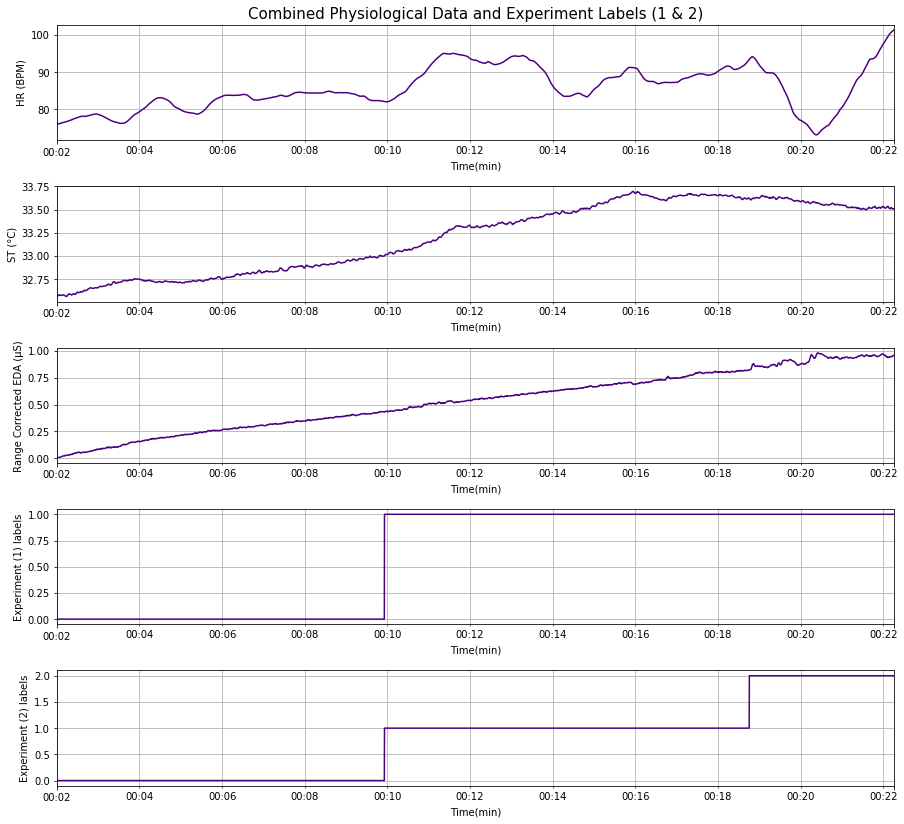

In [74]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1)

ax1.set_title('Combined Physiological Data and Experiment Labels (1 & 2)', fontsize = 15)

experiment1_df[0].plot(ax=ax1, legend=False, color='indigo')
ax1.yaxis.set_label_text("HR (BPM)")
ax1.xaxis.set_label_text('Time(min)')
ax1.grid(which='both', alpha=2)

experiment1_df[1].plot(ax=ax2, legend=False, color='indigo')
ax2.yaxis.set_label_text("ST (°C)")
ax2.xaxis.set_label_text('Time(min)')
ax2.grid(which='both', alpha=2)

experiment1_df[2].plot(ax=ax3, legend=False, color='indigo')
ax3.yaxis.set_label_text("Range Corrected EDA (μS)")
ax3.xaxis.set_label_text('Time(min)')
ax3.grid(which='both', alpha=2)

experiment1_df[3].plot(ax=ax4, legend=False, color='indigo')
ax4.yaxis.set_label_text("Experiment (1) labels")
ax4.xaxis.set_label_text('Time(min)')
ax4.grid(which='both', alpha=2)

experiment2_df[3].plot(ax=ax5, legend=False, color='indigo')
ax5.yaxis.set_label_text("Experiment (2) labels")
ax5.xaxis.set_label_text('Time(min)')
ax5.grid(which='both', alpha=2)

fig.set_size_inches(15, 14)
fig.subplots_adjust(hspace=0.4)

plt.show()

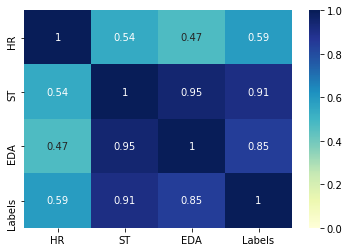

In [75]:
#Correlation matrix with Experiment 1 (binary labels)
labeldata = ['HR', 'ST', 'EDA','Labels']
sns.heatmap(experiment1_df.corr(method = 'pearson'), vmin=0, vmax=1, annot=True, cmap="YlGnBu", yticklabels = labeldata, xticklabels =labeldata)
fig = plt.gcf()

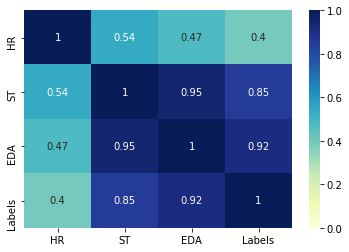

In [76]:
#Correlation matrix with Experiment 2 (Mult-class labels)
sns.heatmap(experiment2_df.corr(method = 'pearson'), vmin=0, vmax=1, annot=True, cmap="YlGnBu", yticklabels = labeldata, xticklabels =labeldata)
fig = plt.gcf()